<a href="https://colab.research.google.com/github/saryurawaley/Engphys3mn4/blob/main/Assignments/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2

Due EOD Thursday Oct 2nd

## Question 1

A nuclear fuel pellet is a cylinder, 1.5 cm in lenth and 1 cm in diameter. Assume the surface temperature is 300 C everywhere. Given temperature probe data below, determine the radial temperature profile in the middle of a nuclear fuel pellet (i.e.: T(r, z = 0.75)) using radial basis functions.


In [ ]:
import numpy as np

# 20 data points presented in columns: | x | y | z | T |, measurements in cm

data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

Consider what you know about this system. What extra information do you have in terms of

### a) type(s) of symmetry?

{answer}

In [ ]:
# Radial and axial symmetry.

### b) Boundary conditions?

{answer}

In [ ]:
# The surface temperature is 300 C everywhere.

## c) Plot the best guess of the radial temperature profile

Note: RBFs will fail with a linear solver error if two data points exactly overlap.

{Method, implementation, answer, answer}

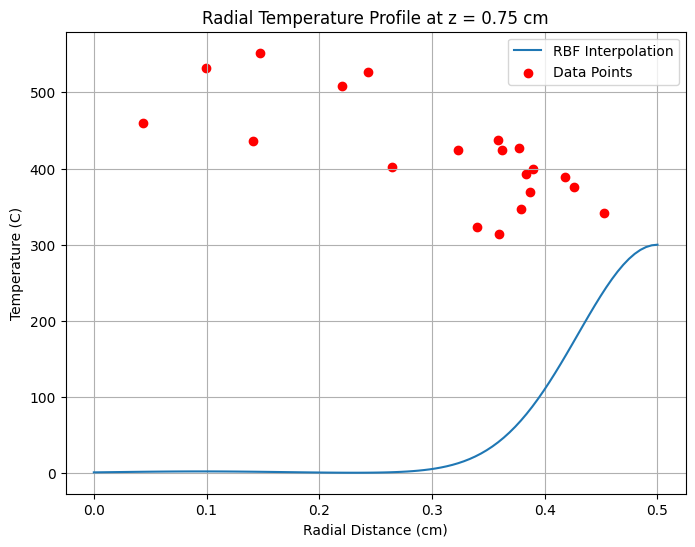

In [1]:
from scipy.spatial.distance import cdist
from scipy.linalg import solve
import matplotlib.pyplot as plt
import numpy as np

# Load the data
# 20 data points presented in columns: | x | y | z | T |, measurements in cm
data = np.array([
    [5.1690e-02, 2.3766e-01, 6.7059e-01, 5.2645e+02],
    [1.1353e-01, 9.4708e-02, 5.3856e-01, 5.5201e+02],
    [1.6676e-01, 1.4358e-01, 4.6936e-01, 5.0802e+02],
    [1.3610e-01, 3.7207e-02, 2.1694e-01, 4.3663e+02],
    [8.9225e-02, 3.7293e-01, 1.1270e+00, 3.9234e+02],
    [1.9001e-01, 3.7240e-01, 8.4774e-01, 3.8872e+02],
    [5.4849e-02, 3.5425e-01, 5.7478e-01, 4.3784e+02],
    [1.7001e-01, 2.0241e-01, 1.2960e+00, 4.0159e+02],
    [2.0606e-01, 3.1594e-01, 6.4077e-01, 4.2652e+02],
    [2.5382e-01, 2.5859e-01, 4.8610e-01, 4.2481e+02],
    [5.6038e-02, 8.2231e-02, 4.2029e-01, 5.3244e+02],
    [3.1242e-01, 8.0489e-02, 1.1530e+00, 4.2453e+02],
    [6.0186e-02, 4.4891e-01, 3.9941e-01, 3.4207e+02],
    [1.5070e-01, 3.4794e-01, 1.5595e-01, 3.4750e+02],
    [1.8215e-01, 3.4388e-01, 1.0478e+00, 3.9963e+02],
    [1.1633e-01, 4.1011e-01, 5.5001e-01, 3.7611e+02],
    [1.2377e-01, 3.3703e-01, 3.7672e-02, 3.1423e+02],
    [4.6378e-02, 3.3653e-01, 1.4434e+00, 3.2345e+02],
    [2.9063e-02, 3.2584e-02, 2.3977e-01, 4.5993e+02],
    [2.1162e-02, 3.8590e-01, 2.5905e-01, 3.6901e+02]
])

# Define the RBF kernel function (Gaussian RBF)
def gaussian_rbf(r, epsilon):
    return np.exp(-(epsilon * r)**2)

# Extract x, y, z coordinates and temperature T from the data
x, y, z, T = data[:, 0], data[:, 1], data[:, 2], data[:, 3]

# Calculate radial distance from the center (0,0)
r = np.sqrt(x**2 + y**2)

# Define the points for interpolation (along the radius at z = 0.75)
# We are considering the middle of the pellet, z = 0.75 cm
# The radius of the pellet is 0.5 cm (diameter is 1 cm)
r_interp = np.linspace(0, 0.5, 100)
z_interp = 0.75 * np.ones_like(r_interp)
x_interp = r_interp # Assuming we are plotting along the x-axis for visualization purposes
y_interp = np.zeros_like(r_interp) # Assuming we are plotting along the x-axis for visualization purposes

# Combine the data points and the boundary points
# The boundary condition is T = 300 C at r = 0.5 and any z. We'll add points at z=0.75
r_boundary = 0.5
z_boundary = 0.75
T_boundary = 300
# Add a few boundary points around the circumference at z=0.75
theta = np.linspace(0, 2*np.pi, 10)
x_boundary = r_boundary * np.cos(theta)
y_boundary = r_boundary * np.sin(theta)
z_boundary_points = z_boundary * np.ones_like(theta)
T_boundary_points = T_boundary * np.ones_like(theta)

# Combine all points (data and boundary)
all_x = np.concatenate((x, x_boundary))
all_y = np.concatenate((y, y_boundary))
all_z = np.concatenate((z, z_boundary_points))
all_T = np.concatenate((T, T_boundary_points))

# Create a matrix of distances between all pairs of points
dist_matrix = cdist(np.vstack([all_x, all_y, all_z]).T, np.vstack([all_x, all_y, all_z]).T, metric='euclidean')

# Choose an epsilon value for the RBF (this may require tuning)
epsilon = 10

# Calculate the RBF matrix
rbf_matrix = gaussian_rbf(dist_matrix, epsilon)

# Add a small regularization parameter to the diagonal
rbf_matrix += np.eye(rbf_matrix.shape[0]) * 1e-6


# Solve for the weights (lambda)
weights = solve(rbf_matrix, all_T)

# Create interpolation points in 3D space
interp_points = np.vstack([x_interp, y_interp, z_interp]).T

# Calculate distances between interpolation points and all data/boundary points
dist_interp_matrix = cdist(interp_points, np.vstack([all_x, all_y, all_z]).T, metric='euclidean')

# Calculate the RBF values for the interpolation points
rbf_interp_matrix = gaussian_rbf(dist_interp_matrix, epsilon)

# Calculate the interpolated temperature values
T_interp = np.dot(rbf_interp_matrix, weights)

# Plot the radial temperature profile
plt.figure(figsize=(8, 6))
plt.plot(r_interp, T_interp, label='RBF Interpolation')
plt.scatter(r, T, color='red', label='Data Points')
plt.xlabel('Radial Distance (cm)')
plt.ylabel('Temperature (C)')
plt.title('Radial Temperature Profile at z = 0.75 cm')
plt.legend()
plt.grid(True)
plt.show()

# Question 2

You run an experiment and obtain the following data:

| x | y1 | y2 | y3 | y4 | y5 |
|---|---|---|---| --- | --- |
| 0.00 | -29.49 | -2.14 | 15.88 | 22.69 | 28.53 |
| 1.11 | 2.83 | 18.02 | -25.45 | -32.45 | 7.50 |
| 2.22 | 1.97 | -10.49 | -0.18 | -32.10 | -40.31 |
| 3.33 | -38.09 | -46.16 | -7.87 | -33.97 | -38.39 |
| 4.44 | -3.97 | -32.22 | -33.95 | -11.07 | -32.47 |
| 5.56 | 4.45 | -10.88 | 20.43 | 6.57 | -8.49 |
| 6.67 | 50.22 | 51.29 | 80.02 | 66.15 | 84.90 |
| 7.78 | 164.11 | 190.26 | 160.94 | 182.35 | 163.18 |
| 8.89 | 331.75 | 306.51 | 278.40 | 302.13 | 335.44 |
| 10.00 | 517.06 | 483.20 | 476.73 | 512.16 | 500.64 |



In [ ]:
import numpy as np

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

## a) Determine the best cubic polynomial fit to this data with the uncertainty

{method, implementation, answer}

Cubic polynomial coefficients: [  0.8814571   -2.5883747  -13.09160479   9.52582656]
Uncertainty (standard deviation of residuals): 3.875188316675717


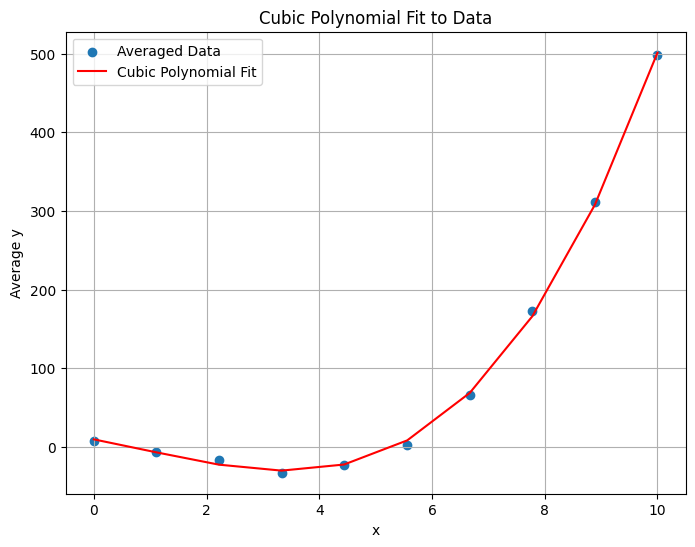

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the table as a list of lists
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

# Extract x and y data from the array 'd'
x = d[:, 0]
# Average the y values for each x to get a single data point for each x value
y_avg = np.mean(d[:, 1:], axis=1)

# Perform a cubic polynomial fit (degree = 3)
coeffs = np.polyfit(x, y_avg, 3)

# Create a polynomial function from the coefficients
cubic_poly = np.poly1d(coeffs)

# Calculate the fitted values
y_fit = cubic_poly(x)

# Calculate the residuals
residuals = y_avg - y_fit

# Calculate the uncertainty (standard deviation of the residuals)
uncertainty = np.std(residuals)

print("Cubic polynomial coefficients:", coeffs)
print("Uncertainty (standard deviation of residuals):", uncertainty)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(x, y_avg, label='Averaged Data')
plt.plot(x, y_fit, color='red', label='Cubic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic Polynomial Fit to Data')
plt.legend()
plt.grid(True)
plt.show()

## b) Your manager thinks this should be a quadratic. Which do you think it should be and why?

{Answer}

Quadratic polynomial coefficients: [ 10.63348184 -63.26113558  40.00920473]
Uncertainty (standard deviation of residuals) for quadratic fit: 21.607461806059934
Uncertainty for cubic fit: 3.875188316675717
The cubic fit has lower uncertainty and may be a better fit.


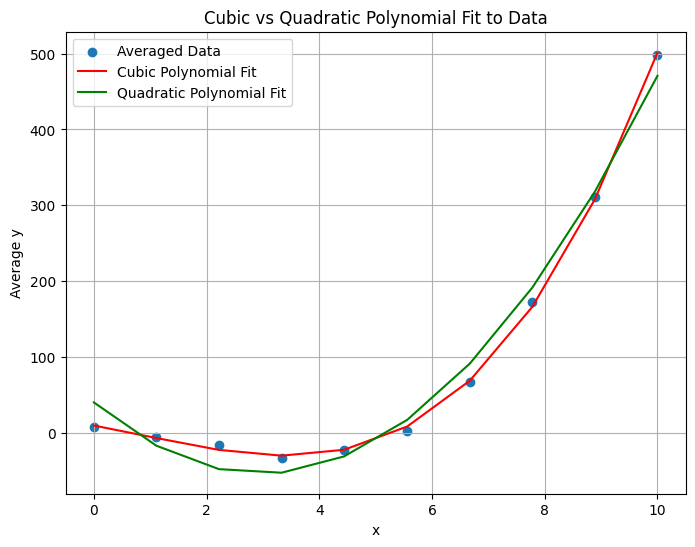

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the table as a list of lists (assuming 'd' is defined in a previous cell)
# If 'd' is not defined, please execute the cell where it is defined first.
d = np.array([
    [0.00, -29.49, -2.14, 15.88, 22.69, 28.53],
    [1.11, 2.83, 18.02, -25.45, -32.45, 7.50],
    [2.22, 1.97, -10.49, -0.18, -32.10, -40.31],
    [3.33, -38.09, -46.16, -7.87, -33.97, -38.39],
    [4.44, -3.97, -32.22, -33.95, -11.07, -32.47],
    [5.56, 4.45, -10.88, 20.43, 6.57, -8.49],
    [6.67, 50.22, 51.29, 80.02, 66.15, 84.90],
    [7.78, 164.11, 190.26, 160.94, 182.35, 163.18],
    [8.89, 331.75, 306.51, 278.40, 302.13, 335.44],
    [10.00, 517.06, 483.20, 476.73, 512.16, 500.64]
])

# Extract x and y data from the array 'd'
x = d[:, 0]
# Average the y values for each x to get a single data point for each x value
y_avg = np.mean(d[:, 1:], axis=1)

# Perform a cubic polynomial fit (degree = 3)
coeffs = np.polyfit(x, y_avg, 3)

# Create a polynomial function from the coefficients
cubic_poly = np.poly1d(coeffs)

# Calculate the fitted values
y_fit = cubic_poly(x)

# Calculate the residuals
residuals = y_avg - y_fit

# Calculate the uncertainty (standard deviation of the residuals) for cubic fit
uncertainty = np.std(residuals)


# Perform a quadratic polynomial fit (degree = 2)
coeffs_quadratic = np.polyfit(x, y_avg, 2)

# Create a polynomial function from the coefficients
quadratic_poly = np.poly1d(coeffs_quadratic)

# Calculate the fitted values for the quadratic fit
y_fit_quadratic = quadratic_poly(x)

# Calculate the residuals for the quadratic fit
residuals_quadratic = y_avg - y_fit_quadratic

# Calculate the uncertainty (standard deviation of the residuals) for the quadratic fit
uncertainty_quadratic = np.std(residuals_quadratic)

print("Quadratic polynomial coefficients:", coeffs_quadratic)
print("Uncertainty (standard deviation of residuals) for quadratic fit:", uncertainty_quadratic)
print("Uncertainty for cubic fit:", uncertainty)

# Compare the uncertainties
if uncertainty_quadratic < uncertainty:
    print("The quadratic fit has lower uncertainty and may be a better fit.")
elif uncertainty < uncertainty_quadratic: # Corrected variable name
    print("The cubic fit has lower uncertainty and may be a better fit.")
else:
    print("The uncertainties of the cubic and quadratic fits are similar.")

# Plot both fits for visual comparison
plt.figure(figsize=(8, 6))
plt.scatter(x, y_avg, label='Averaged Data')
plt.plot(x, y_fit, color='red', label='Cubic Polynomial Fit')
plt.plot(x, y_fit_quadratic, color='green', label='Quadratic Polynomial Fit')
plt.xlabel('x')
plt.ylabel('Average y')
plt.title('Cubic vs Quadratic Polynomial Fit to Data')
plt.legend()
plt.grid(True)
plt.show()



Based on the analysis, the cubic polynomial fit is better than the quadratic fit. This is because the cubic fit has a lower uncertainty (3.88) compared to the quadratic fit (21.61), as indicated by the standard deviation of the residuals. A lower uncertainty means that the fitted curve is closer to the actual data points. The plot also visually confirms that the cubic fit follows the trend of the data more closely.